pandas date/time offset alias: [http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases](http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases)<br>
pandas resampling: [https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.resample.html](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.resample.html)<br>
Awesome example of pandas time series capabilities: [https://tomaugspurger.github.io/modern-7-timeseries](https://tomaugspurger.github.io/modern-7-timeseries)<br>
Jupyter ipywidgets official documentation: [https://ipywidgets.readthedocs.io/en/latest/index.html](https://ipywidgets.readthedocs.io/en/latest/index.html)

In [29]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
# Set global figure size
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
df = pd.read_csv('/home/pybokeh/Dropbox/python/jupyter_notebooks/time_series_analysis/EGA_Power_Usage_Over_Time.csv', 
                 parse_dates=['Timestamp'])

In [3]:
df.head()

,Timestamp,Virtual_Meters.EGA Block Demand Real Power
0,2017-05-01 23:30:00,190
1,2017-05-02 00:00:00,182
2,2017-05-02 00:30:00,195
3,2017-05-02 01:00:00,191
4,2017-05-02 01:30:00,198


**I don't like the one column name, so I'll change it:**

In [4]:
df.columns = ['Time_Stamp', 'Power_Usage']

In [5]:
df['WeekDay'] = df['Time_Stamp'].dt.weekday_name

In [6]:
df.head()

,Time_Stamp,Power_Usage,WeekDay
0,2017-05-01 23:30:00,190,Monday
1,2017-05-02 00:00:00,182,Tuesday
2,2017-05-02 00:30:00,195,Tuesday
3,2017-05-02 01:00:00,191,Tuesday
4,2017-05-02 01:30:00,198,Tuesday


### To leverage Pandas' awesome resampling and upsampling methods, convert our Time_Stamp column to a dataframe index:

In [7]:
df = df.set_index('Time_Stamp')
df.head()

,Power_Usage,WeekDay
Time_Stamp,,
2017-05-01 23:30:00,190,Monday
2017-05-02 00:00:00,182,Tuesday
2017-05-02 00:30:00,195,Tuesday
2017-05-02 01:00:00,191,Tuesday
2017-05-02 01:30:00,198,Tuesday


**Since our time series data is in 30-minute intervals, we can explore upsampling or downsampling our data to see if there are trends on a minute, daily, weekly, monthly, yearly, whatever-basis.**

### Hourly-basis:

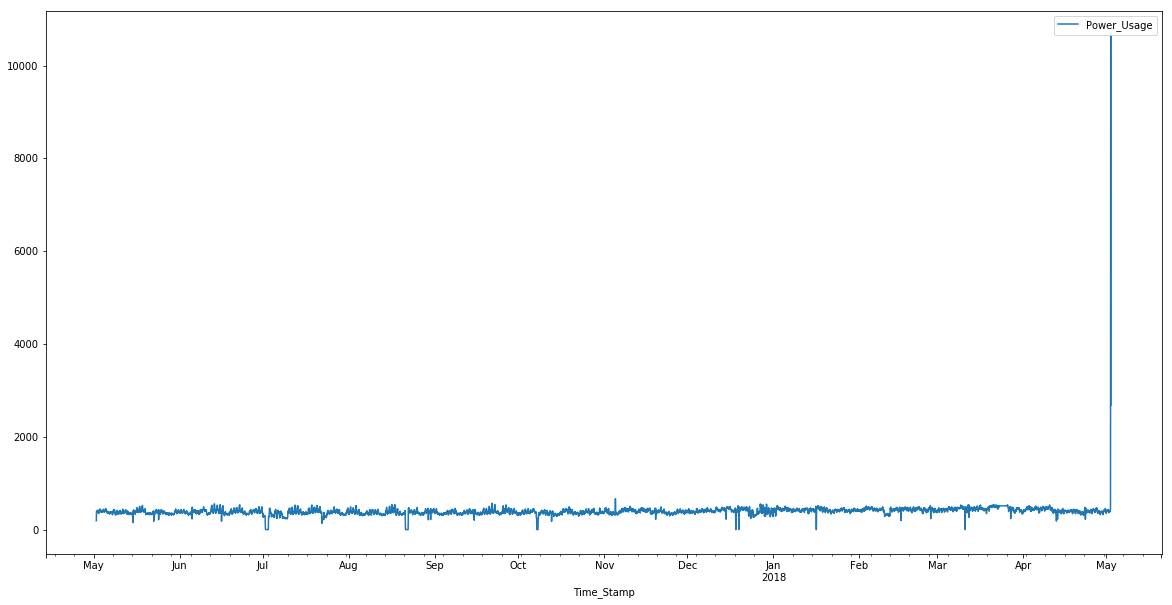

In [30]:
df.resample('H').sum().plot()

### Daily-basis:

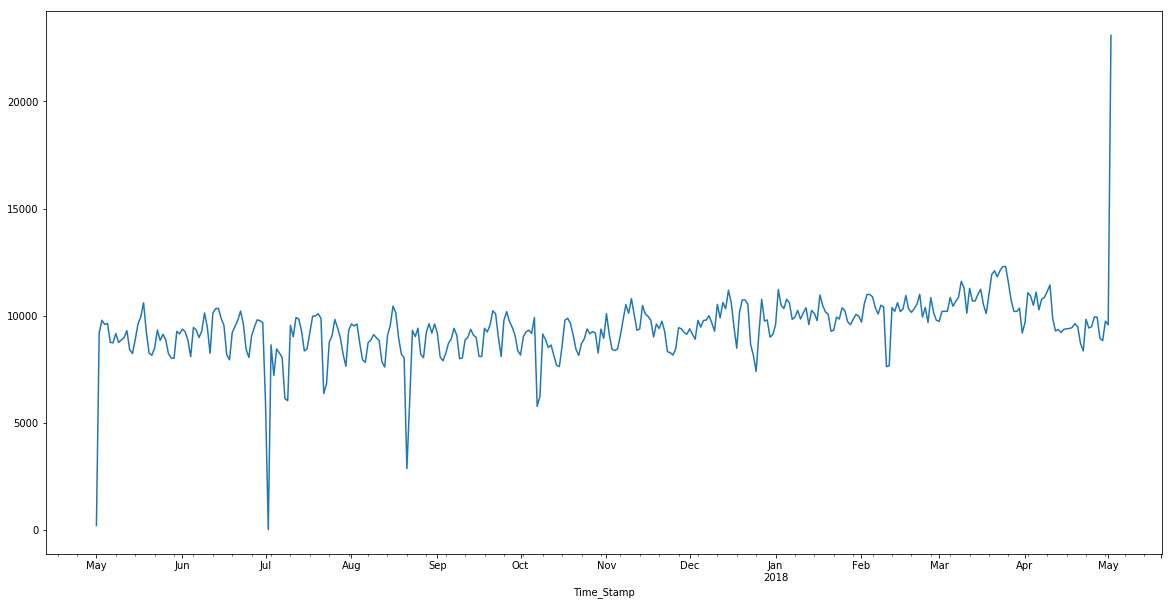

In [31]:
df.Power_Usage.resample('D').sum().plot()

### Weekly-basis:

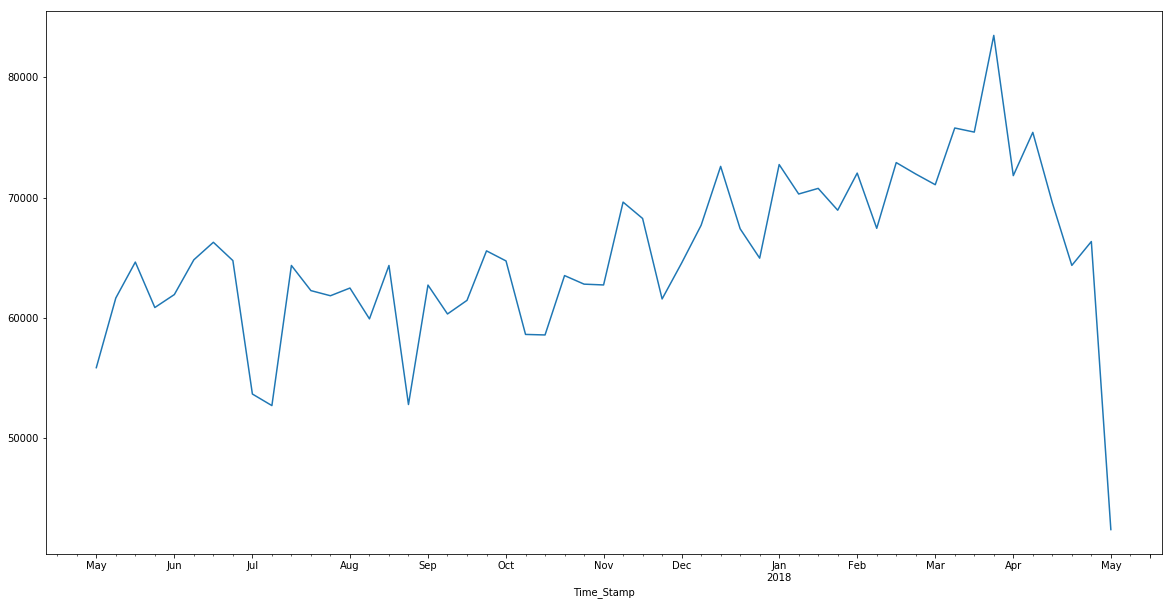

In [32]:
df.Power_Usage.resample('W').sum().plot()

### Monthly-basis:

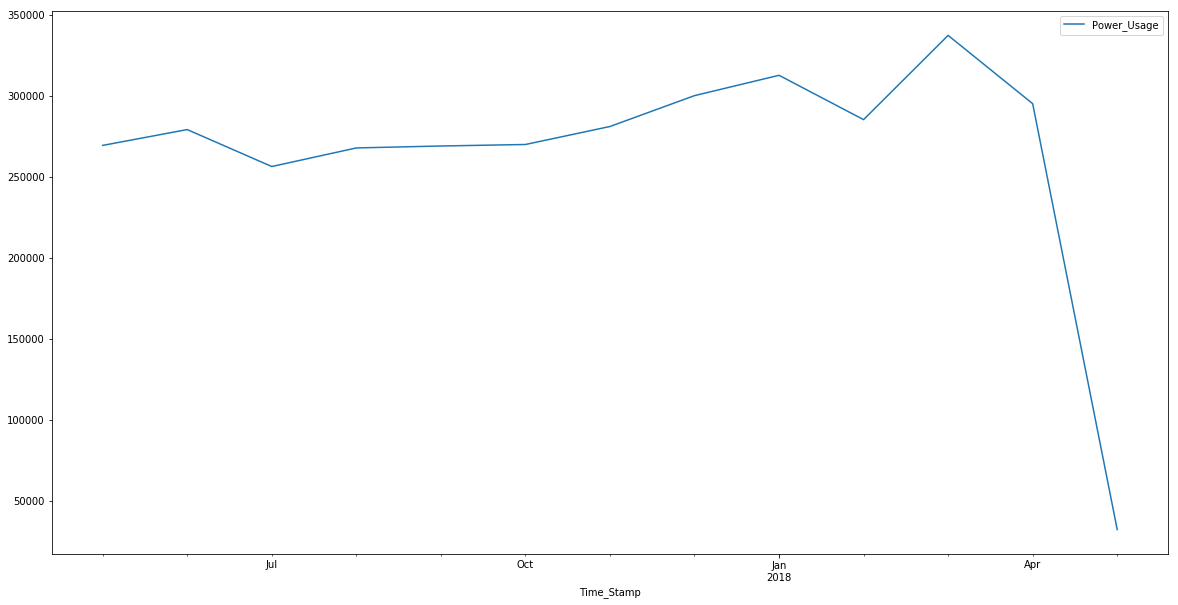

In [33]:
df.resample('M').sum().plot()

### Want to filter for a specific month? Just filter using .loc['YYYY-MM']

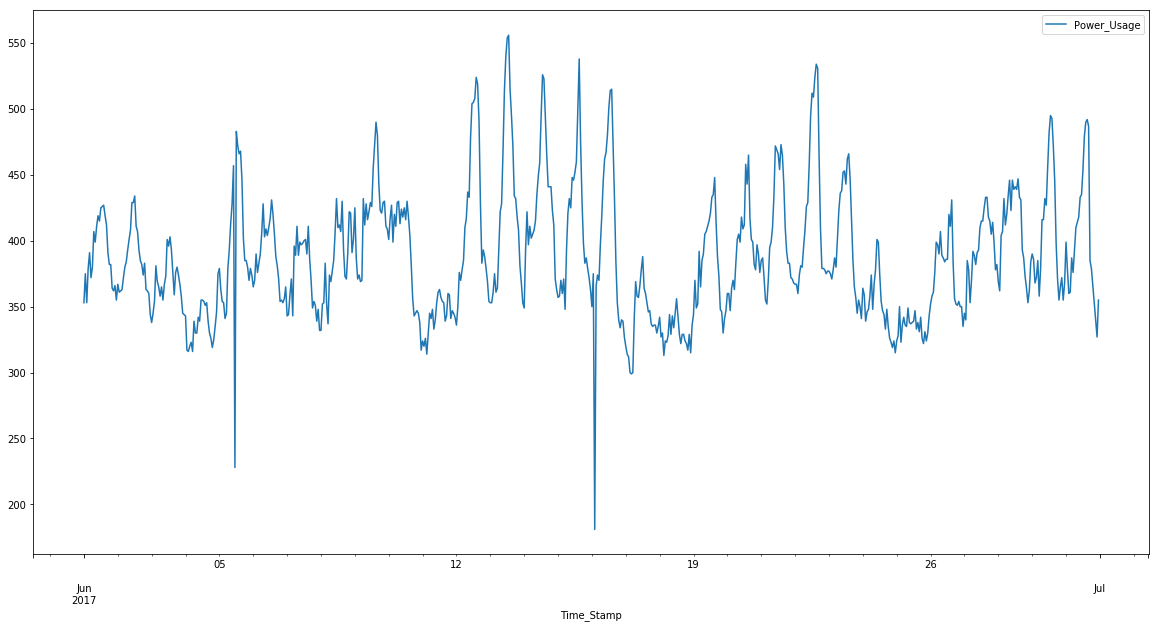

In [34]:
df.loc['2017-06'].resample('H').sum().plot()

### Want to filter down to a specific day? Just filter using .loc['YYYY-MM-DD']

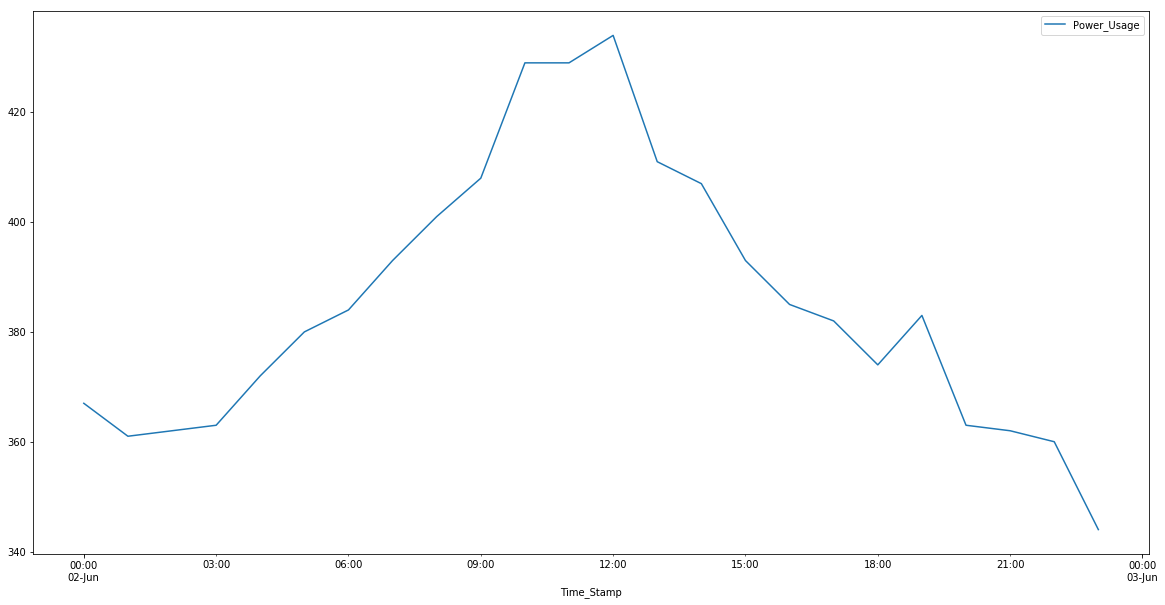

In [35]:
df.loc['2017-06-02'].resample('H').sum().plot()

### How about for a certain date range? Just use slice sytax .loc[start : end]:

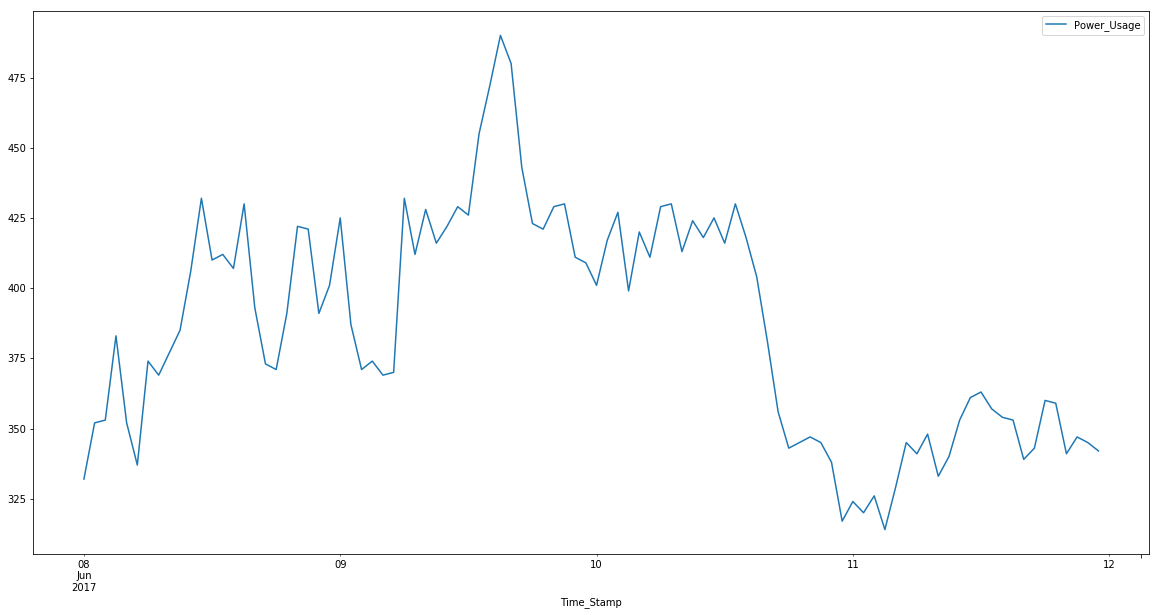

In [36]:
df.loc['2017-06-08':'2017-06-11'].resample('H').sum().plot()

### Want to look at certain day of the week? Since we added ```WeekDay``` column, we can just use .query() method:

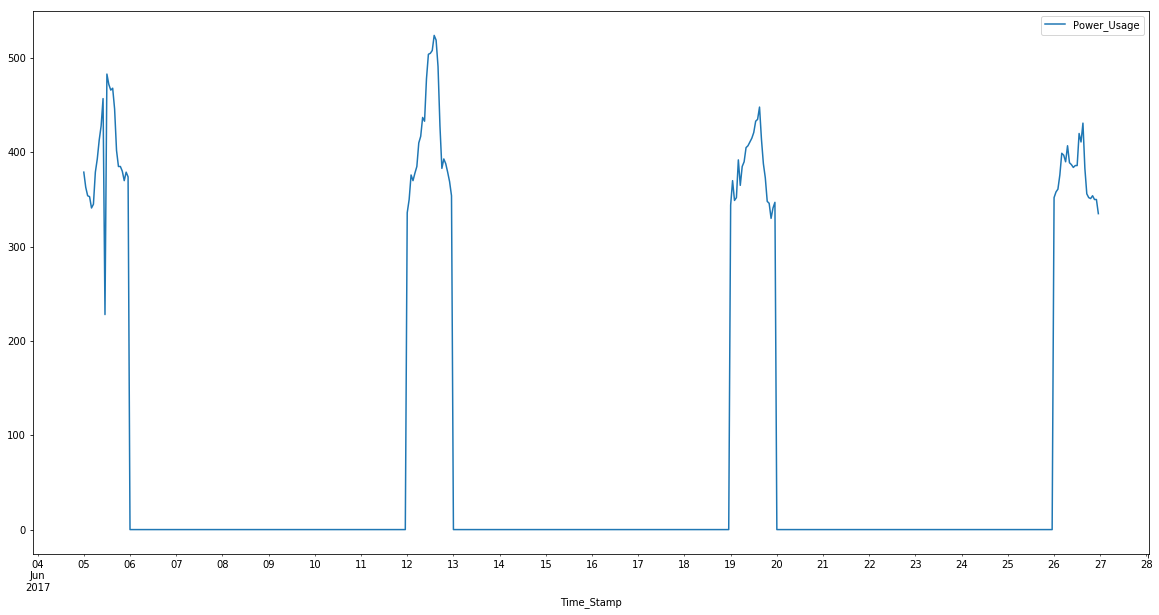

In [37]:
# Only Mondays in the month of June 2017
df.query("WeekDay == 'Monday'").loc['2017-06'].resample('H').sum().plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a73151160>],
      dtype=object)

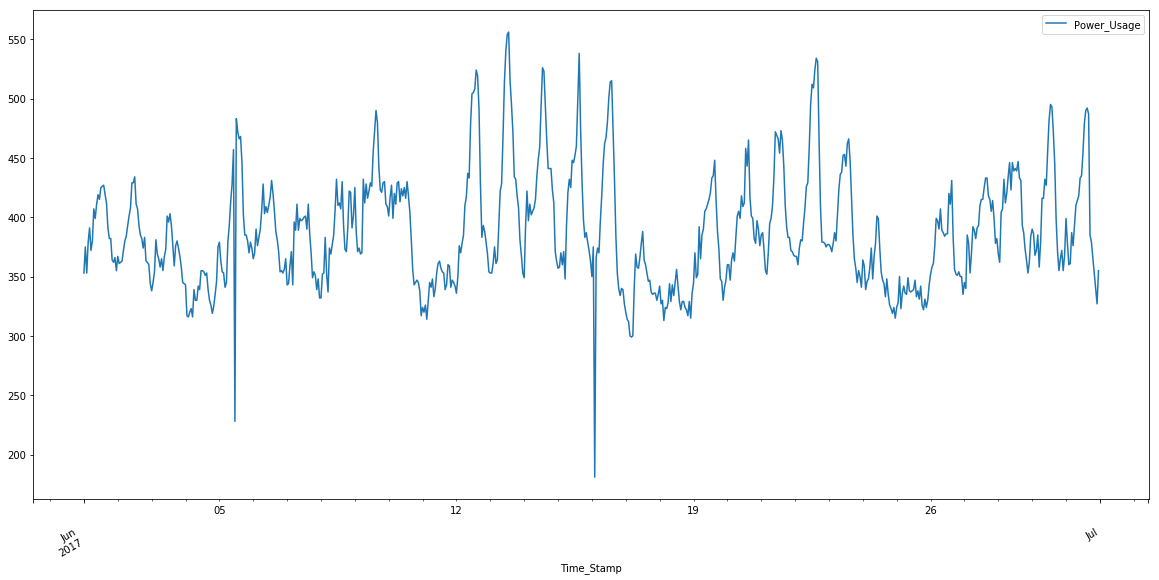

In [38]:
# Only Mondays in the month of June 2017
df.loc['2017-06'].resample('H').sum().plot(subplots=True, by='WeekDay')

In [17]:
df.loc['2017-06'].resample('H').sum()

,Power_Usage
Time_Stamp,
2017-06-01 00:00:00,353
2017-06-01 01:00:00,375
2017-06-01 02:00:00,353
2017-06-01 03:00:00,379
2017-06-01 04:00:00,391
2017-06-01 05:00:00,372
2017-06-01 06:00:00,380
2017-06-01 07:00:00,407
2017-06-01 08:00:00,399


**BONUS:** Want to print out a calendar so that you can see what day of the week a date falls under? Import calendar module:

In [18]:
import calendar
c = calendar.TextCalendar(calendar.SUNDAY)
c.pryear(2017)
c.pryear(2018)

                                  2017

      January                   February                   March
Su Mo Tu We Th Fr Sa      Su Mo Tu We Th Fr Sa      Su Mo Tu We Th Fr Sa
 1  2  3  4  5  6  7                1  2  3  4                1  2  3  4
 8  9 10 11 12 13 14       5  6  7  8  9 10 11       5  6  7  8  9 10 11
15 16 17 18 19 20 21      12 13 14 15 16 17 18      12 13 14 15 16 17 18
22 23 24 25 26 27 28      19 20 21 22 23 24 25      19 20 21 22 23 24 25
29 30 31                  26 27 28                  26 27 28 29 30 31

       April                      May                       June
Su Mo Tu We Th Fr Sa      Su Mo Tu We Th Fr Sa      Su Mo Tu We Th Fr Sa
                   1          1  2  3  4  5  6                   1  2  3
 2  3  4  5  6  7  8       7  8  9 10 11 12 13       4  5  6  7  8  9 10
 9 10 11 12 13 14 15      14 15 16 17 18 19 20      11 12 13 14 15 16 17
16 17 18 19 20 21 22      21 22 23 24 25 26 27      18 19 20 21 22 23 24
23 24 25 26 27 28 29      28 

# Using ipywidgets

[Official Documentation](https://ipywidgets.readthedocs.io/en/latest/index.html)

Instead of manually entering/typing the various months, we can use GUI widgets instead to choose the month.

In [19]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

To choose the months to select, we obviously need to create a list of months.  So how do we obtain a unique list of months that is in our data set?

We can just create a pandas dataframe on monthly resampled data and then obtain the index values.  But when we do that, the index values are of type ```datetime```:

In [20]:
df.resample('M').sum()

,Power_Usage
Time_Stamp,
2017-05-31,269423
2017-06-30,279171
2017-07-31,256397
2017-08-31,267855
2017-09-30,269056
2017-10-31,269979
2017-11-30,281066
2017-12-31,300093
2018-01-31,312624


In [21]:
df.resample('M').sum().index

DatetimeIndex(['2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
               '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31'],
              dtype='datetime64[ns]', name='Time_Stamp', freq='M')

But, we can convert the values of ```datetime``` to ```str``` by utilizing ```.astype(str)``` function.  Another problem is we only want YYYY-MM portion of the index values, so we need to also slice the string to get the first 7 characters:

In [22]:
# Building a Python list using list comprehension syntax
month_list = [month[:7] for month in df.resample('M').sum().index.astype(str)]

In [23]:
month_list

['2017-05',
 '2017-06',
 '2017-07',
 '2017-08',
 '2017-09',
 '2017-10',
 '2017-11',
 '2017-12',
 '2018-01',
 '2018-02',
 '2018-03',
 '2018-04',
 '2018-05']

Alternative, we can build a Python list using a FOR loop syntax:

In [24]:
month_list = []
for month in df.resample('M').sum().index.astype(str):
    month_list.append(month[:7])

month_list

['2017-05',
 '2017-06',
 '2017-07',
 '2017-08',
 '2017-09',
 '2017-10',
 '2017-11',
 '2017-12',
 '2018-01',
 '2018-02',
 '2018-03',
 '2018-04',
 '2018-05']

Now that we have a list of valid months, we can leverage ipywidgets API to create a drop down menu widget containing our months:

In [39]:
@interact
def byMonth(month=month_list):
    df.loc[month].resample('D').sum().plot()

interactive(children=(Dropdown(description='month', options=('2017-05', '2017-06', '2017-07', '2017-08', '2017…

We can also add another drop down menu for the resampling interval.  Just simply pass in a list of valid resampling values ('H' for hourly, 'D' for daily, and 'W' for weekly):

In [40]:
@interact
def byMonth(month=month_list, interval=['H','D','W']):
    df.loc[month].resample(interval).sum().plot()

interactive(children=(Dropdown(description='month', options=('2017-05', '2017-06', '2017-07', '2017-08', '2017…

If you don't want the chart to be created immediately at "render" time, but instead when a user clicks a button, use interact_manual:

In [27]:
interact_manual(byMonth, month=month_list, interval=['H','D','W'], )

interactive(children=(Dropdown(description='month', options=('2017-05', '2017-06', '2017-07', '2017-08', '2017…

<function __main__.byMonth(month=['2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05'], interval=['H', 'D', 'W'])>

# Complete Script Using ipywidgets

In [28]:
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import ipywidgets as widgets
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
# Set global figure size
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

df = pd.read_csv('/home/pybokeh/Dropbox/python/jupyter_notebooks/time_series_analysis/EGA_Power_Usage_Over_Time.csv', 
                 parse_dates=['Timestamp'])

# I don't like the original column names, so I'll rename them
df.columns = ['Time_Stamp', 'Power_Usage']

# Let's also add a new column called WeekDay
df['WeekDay'] = df['Time_Stamp'].dt.weekday_name

# Set Time_Stamp as a dataframe index
df = df.set_index('Time_Stamp')

# Building a Python list using list comprehension syntax
month_list = [month[:7] for month in df.resample('M').sum().index.astype(str)]


label_bymonth = widgets.HTML(
    value="<b>By Month:</b>"
)
display(label_bymonth)

@interact
def byMonth(month=month_list, interval=['H','D','W']):
    df.loc[month].resample(interval).sum().plot()

    
label_bymonthweekday = widgets.HTML(
    value="<b>By Month-Week Day:</b>"
)
display(label_bymonthweekday)

@interact
def byWeekDayMonth(month=month_list, weekday=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']):
    df.query("WeekDay == @weekday").loc[month].resample('H').sum().plot()

label_bydateranges = widgets.HTML(
    value="<b>By Date Ranges:</b>"
)
display(label_bydateranges)    

def byDateInterval(interval=['H','D','W']):
    df.loc[start_date.value:end_date.value].resample(interval).sum().plot()
    
start_date = widgets.DatePicker(
    description='Start Date:',
    disabled=False
)

end_date = widgets.DatePicker(
    description='End Date:',
    disabled=False
)
    
display(start_date)
display(end_date)
try:
    interact_manual(byDateInterval, interval=['H','D','W'])
except:
    print("Please enter valid start and end dates")

HTML(value='<b>By Month:</b>')

interactive(children=(Dropdown(description='month', options=('2017-05', '2017-06', '2017-07', '2017-08', '2017…

HTML(value='<b>By Month-Week Day:</b>')

interactive(children=(Dropdown(description='month', options=('2017-05', '2017-06', '2017-07', '2017-08', '2017…

HTML(value='<b>By Date Ranges:</b>')

DatePicker(value=None, description='Start Date:')

DatePicker(value=None, description='End Date:')

interactive(children=(Dropdown(description='interval', options=('H', 'D', 'W'), value='H'), Button(description…